# <h1><center>**`Employee Attrition Problem`**</center></h1>

### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [3]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [4]:
# Load the train_dataset, train_salaries, test_dataset(pass your file path from drive)

train_data = pd.read_csv("C:\\Users\\ACER\\Downloads\\train_dataset.csv")
train_data_salaries = pd.read_csv("C:\\Users\\ACER\\Downloads\\train_salaries.csv")
test_data = pd.read_csv("C:\\Users\\ACER\Downloads\\test_dataset.csv")

In [5]:
# check the train data
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [6]:
# check the train data salaries
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [7]:
# check the test data
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [8]:
# Adding salary data to train_dataset using merge on jobId
train_data = pd.merge(train_data,train_data_salaries,on='jobId')
train_data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [9]:
#salaries less that 30 can be removed as such a such salary per month is not expected
train_data = train_data[train_data['salary'] > 30]

In [10]:
train_data.shape

(997548, 9)

# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [11]:
# get all column names
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [12]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [13]:
# Check which columns are having categorical, numerical or boolean values of test_dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [14]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [15]:
train_data[0:50000].describe()    # mean for 10l & 50k record is exaclty same, so we use here 50k for training to save time

,yearsExperience,milesFromMetropolis,salary
count,50000.000000,50000.000000,50000.00000
mean,11.939760,49.233740,116.12006
std,7.208252,28.724421,38.41533
min,0.000000,0.000000,31.00000
25%,6.000000,24.000000,89.00000
50%,12.000000,49.000000,114.00000
75%,18.000000,74.000000,141.00000
max,24.000000,99.000000,292.00000


In [16]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test_data.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


## Get the total number of samples in the dataset using the len() function

In [17]:
# len of train and test dataset
print('Train data length:', len(train_data))
print('Test data length:', len(test_data))

Train data length: 997548
Test data length: 1000000


## Get unique values

In [18]:
# get how many unique values are in train_dataset
train_data.nunique().sort_values(ascending=False)

jobId                  997548
salary                    265
milesFromMetropolis       100
companyId                  63
yearsExperience            25
major                       9
jobType                     8
industry                    7
degree                      5
dtype: int64

In [19]:
# get how many unique values are in test_dataset
test_data.nunique().sort_values(ascending=False)

jobId                  1000000
milesFromMetropolis        100
companyId                   63
yearsExperience             25
major                        9
jobType                      8
industry                     7
degree                       5
dtype: int64

## Counting the total number of missing values¶

In [20]:
# Check for missing values in all the columnns of the train_dataset
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [21]:
 # Check for missing values in all the columnns of the test_dataset
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [22]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(['jobId','companyId'],axis=1)
train_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


In [23]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(['jobId','companyId'],axis=1)
test_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [24]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
numerical_list = []
# looping on whole dataset for geting list of categorical data column name

for x in train_data.columns:
    if train_data[x].dtype=='object':
        categorical_list.append(x)
        
    else:
        numerical_list.append(x)
        
    #elif train_data[x].dtype=='int64':
        #var_list.append(x)
        
    #elif train_data[x].dtype=='float64':
        #var_list.append(x)

In [25]:
categorical_list

['jobType', 'degree', 'major', 'industry']

In [26]:
numerical_list

['yearsExperience', 'milesFromMetropolis', 'salary']

In [27]:
train_data.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [28]:
train_data['jobType'].unique()

array(['CFO', 'CEO', 'VICE_PRESIDENT', 'MANAGER', 'JUNIOR', 'JANITOR',
       'CTO', 'SENIOR'], dtype=object)

In [29]:
train_data['degree'].unique()

array(['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE'],
      dtype=object)

In [30]:
train_data['major'].unique()

array(['MATH', 'NONE', 'PHYSICS', 'CHEMISTRY', 'COMPSCI', 'BIOLOGY',
       'LITERATURE', 'BUSINESS', 'ENGINEERING'], dtype=object)

In [31]:
train_data['industry'].unique()

array(['HEALTH', 'WEB', 'AUTO', 'FINANCE', 'EDUCATION', 'OIL', 'SERVICE'],
      dtype=object)

## Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [35]:
train_data.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.003642,0.370974
milesFromMetropolis,0.003642,1.000000,-0.294435
salary,0.370974,-0.294435,1.000000


## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

[Text(0.5, 0, 'yearsExperience'),
 Text(1.5, 0, 'milesFromMetropolis'),
 Text(2.5, 0, 'salary')]

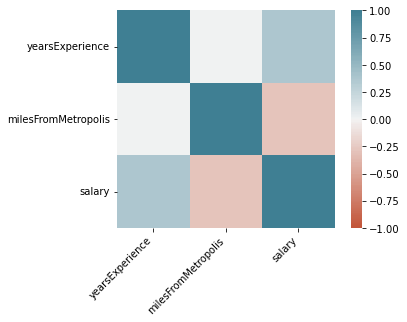

In [36]:
# Correlation metrix using seaborn
ax = sns.heatmap(train_data.corr(),vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [37]:
# import necessary libraries for chi-square test      # relationship between categorical variable 
from scipy.stats import chi2_contingency  # if p value less than 0.05 null hypo(no relationship between categorical variable) is
from scipy.stats import chi2 # rejected ,,& i.e altenate hypo (there is relationship between categorical variable) is accepted
                                
def perform_chi_square_test(var_1,var_2):  # checking relation bet 2 categorical variable 
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1],train_data[var_2])   # unique values in  2 categorical variable in crosstab
    
    #Observed Values
    observed_values = contingency_table.values
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [38]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print('chi-square test on: ',x,' ',i,'\n')
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  49153.86411257831
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  16381.915810303108
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  100.30610291761408
critical_value: 58.12403768086803
p-value: 1.1246299327360987e-06
Reject H0,There is a relationship between 2 c

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


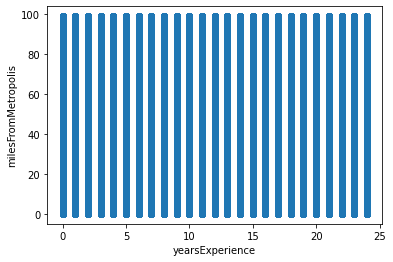

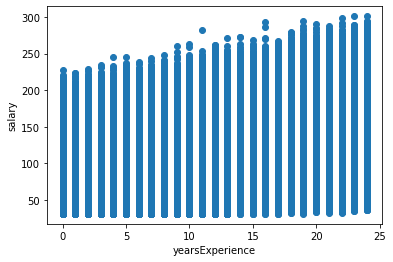

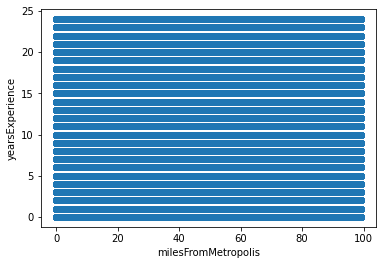

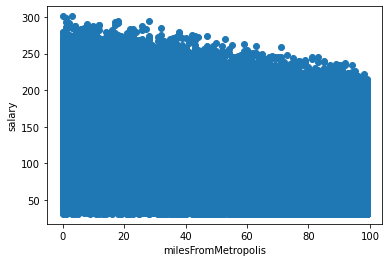

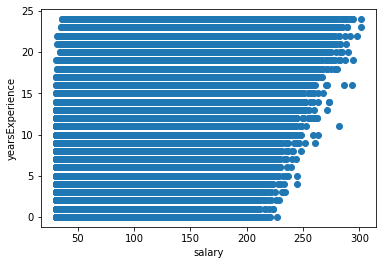

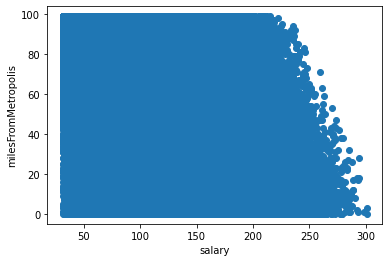

In [39]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x],train_data[y])
    plt.show()
    

# Loop through the different columns 
for i in numerical_list:
    for j in numerical_list:
        if i != j:
            plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


array([[<AxesSubplot:title={'center':'yearsExperience'}>,
        <AxesSubplot:title={'center':'milesFromMetropolis'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

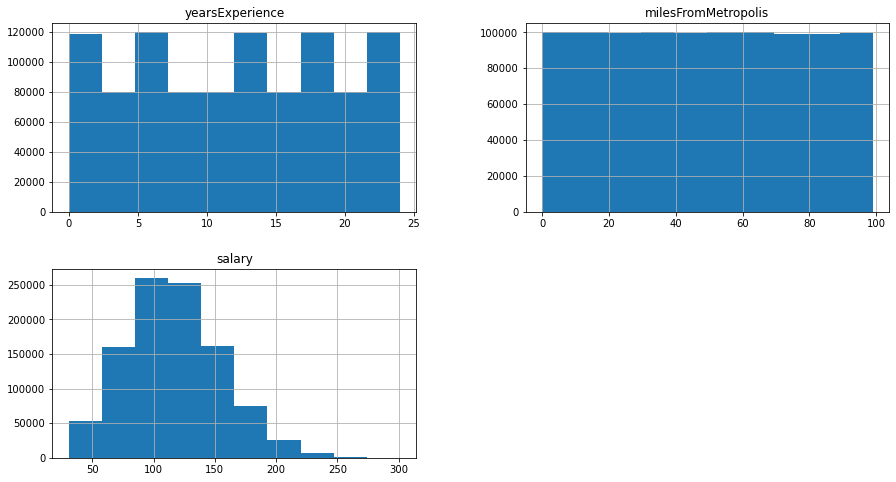

In [40]:
# Histogram using pandas 
train_data.hist(figsize=(15,8))

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


<AxesSubplot:>

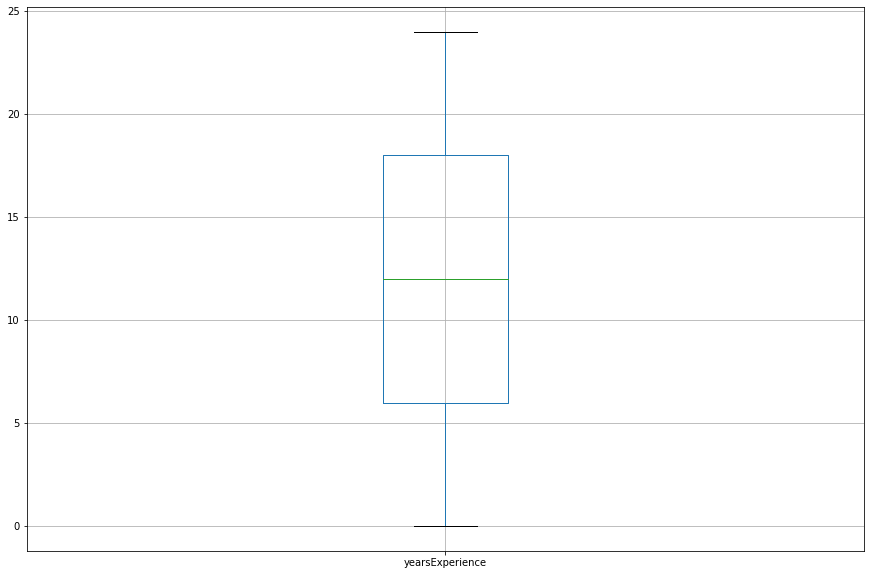

In [41]:
# box plot using pandas 
# box plot for yearsExperience column
train_data.boxplot(column='yearsExperience',figsize=(15,10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

<AxesSubplot:>

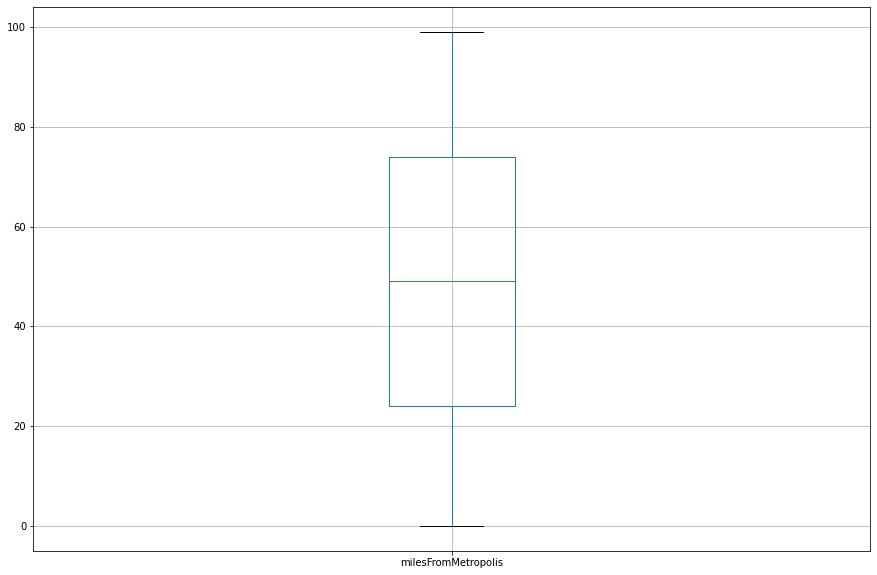

In [42]:
# box plot using pandas 
# box plot for milesFromMetropolies column
train_data.boxplot(column='milesFromMetropolis',figsize=(15,10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

<AxesSubplot:>

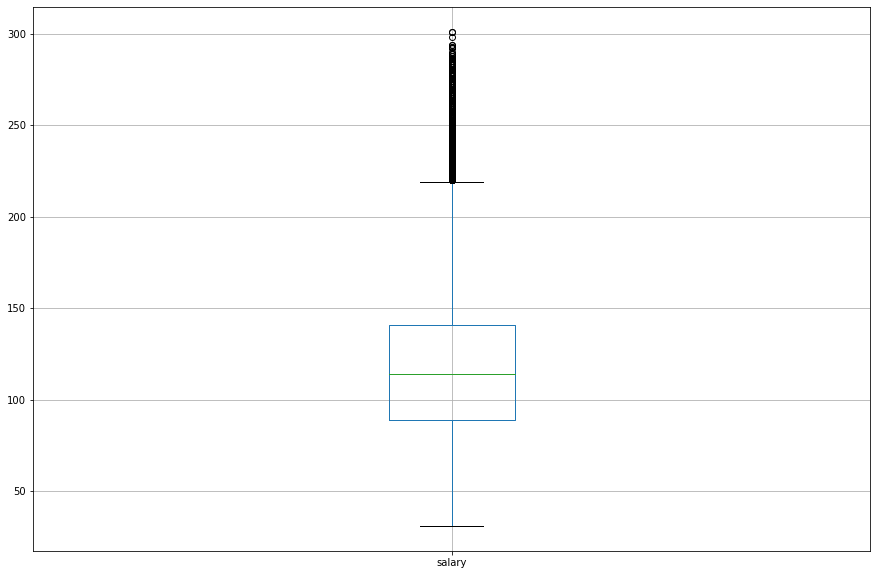

In [43]:
# box plot using pandas 
# box plot for salary column
train_data.boxplot(column='salary',figsize=(15,10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120

In [44]:
#for col in numerical_list:
    #train_data.boxplot(col,figsize=(10,50))


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

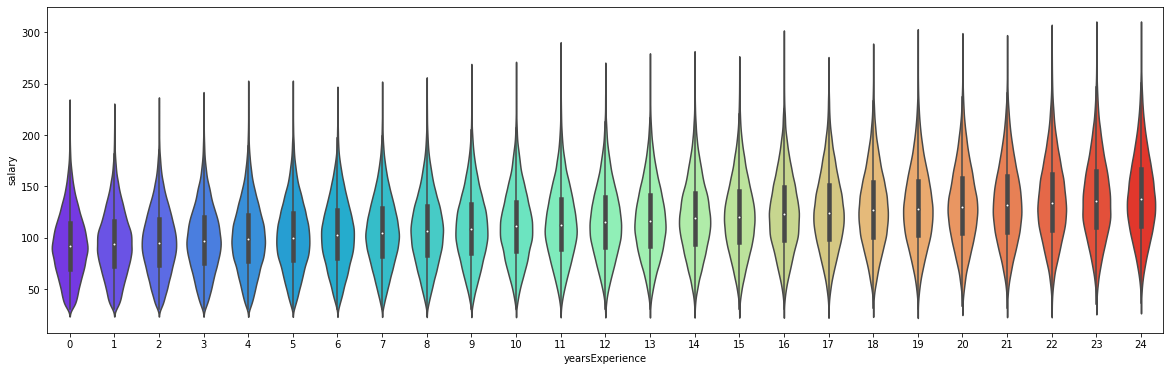

In [45]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

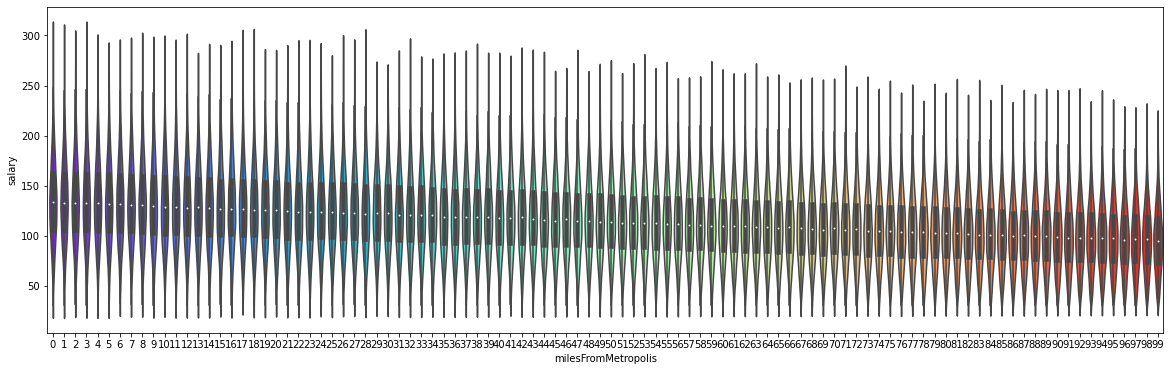

In [46]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

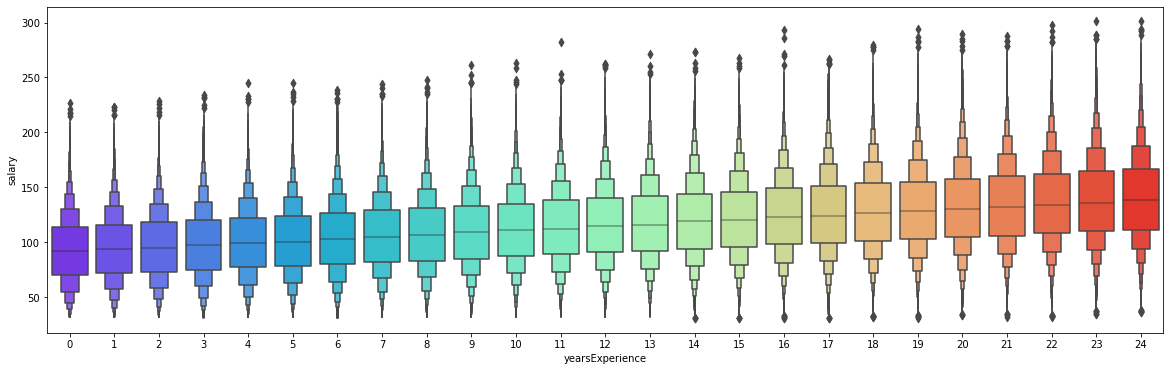

In [47]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


<AxesSubplot:xlabel='yearsExperience', ylabel='count'>

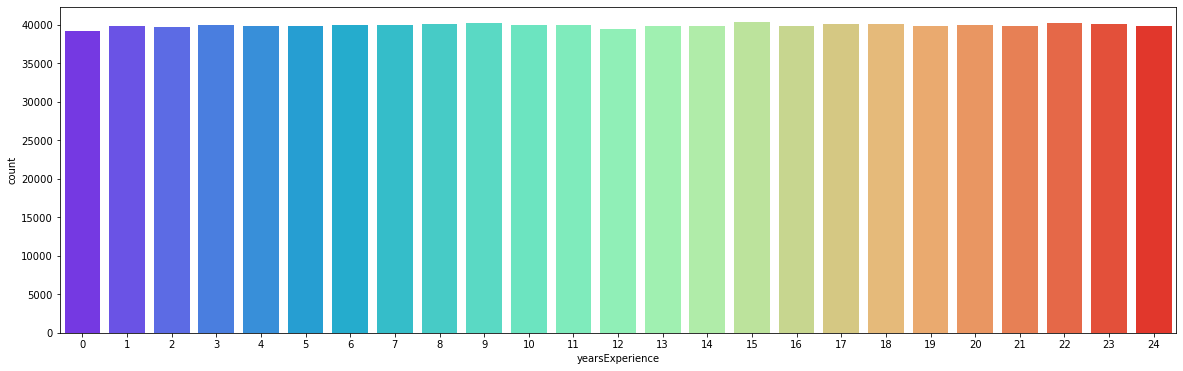

In [48]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))
sns.countplot(x='yearsExperience',data=train_data,palette='rainbow')

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='count'>

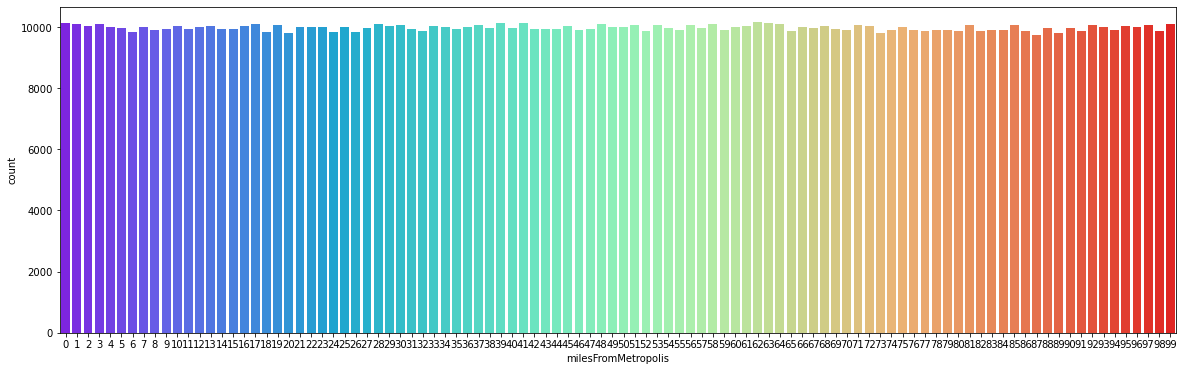

In [49]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(20,6))
sns.countplot(x='milesFromMetropolis',data=train_data,palette='rainbow')

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

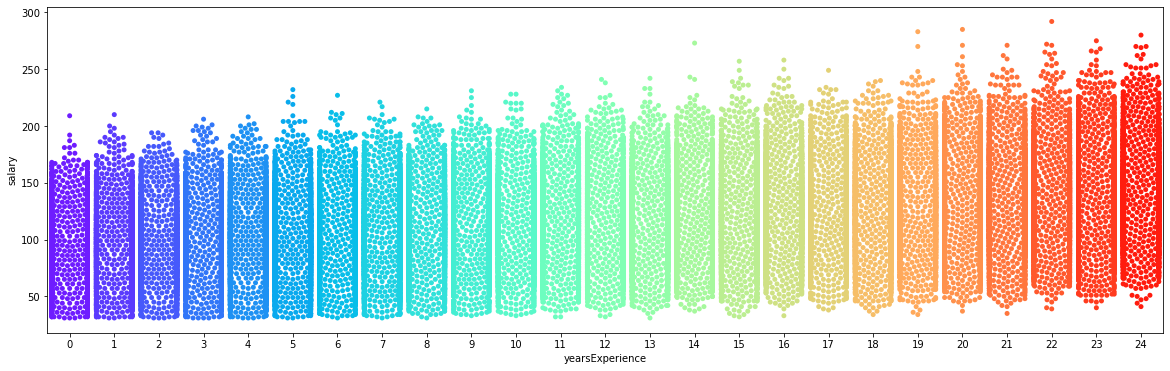

In [50]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000],palette='rainbow')

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

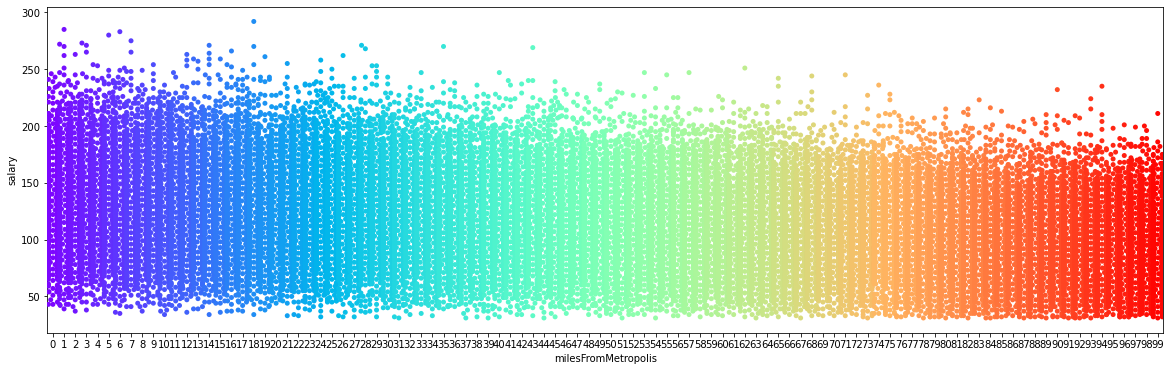

In [51]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000],palette='rainbow')

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

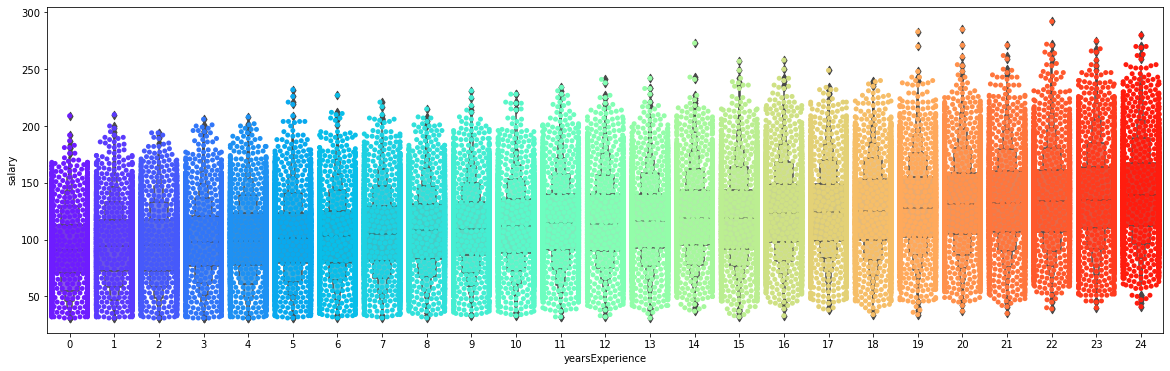

In [52]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='yearsExperience',y='salary',data=train_data.iloc[1:50000],palette='rainbow')

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

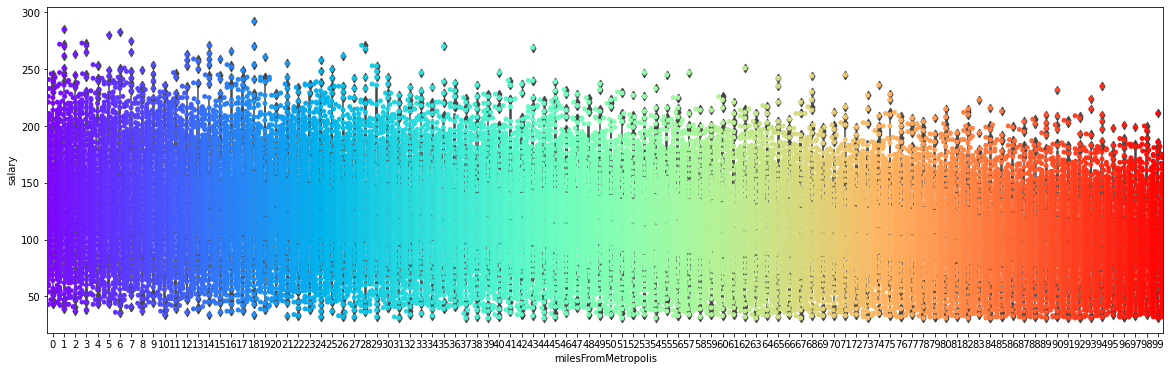

In [53]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000],palette='rainbow')
sns.swarmplot(x='milesFromMetropolis',y='salary',data=train_data.iloc[1:50000],palette='rainbow')

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

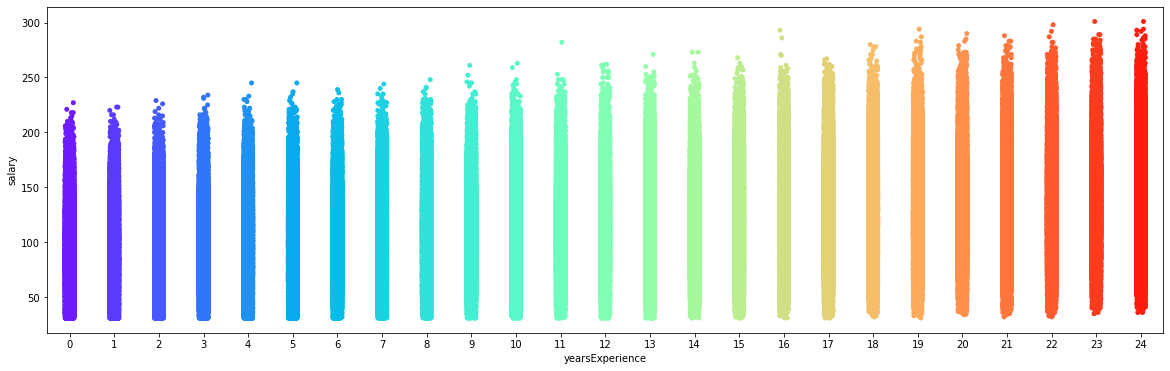

In [54]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')

from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

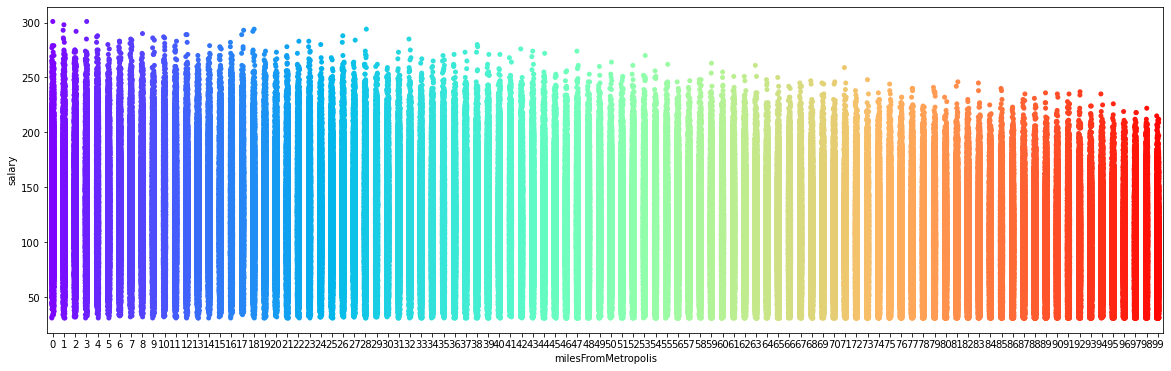

In [55]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [56]:
# import statsmodle library for vif 
import statsmodels.api as sm

In [57]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(['jobType','degree','major','industry','salary'],axis=1)


# target values
target = train_data['salary']


# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

['yearsExperience', 'milesFromMetropolis']

In [58]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[:,train_for_vif.columns == names[i]]
  # taking all other remaining columns as feature variable
  x = train_for_vif.loc[:,train_for_vif.columns != names[i]]
  # firting the OLS model on y and x
  model = sm.OLS(y,x)
  results = model.fit()
  # geting the r^2 value of results.
  rsq = results.rsquared
  # calculating vif value
  vif = round(1/(1-rsq),2)
  print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.22 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

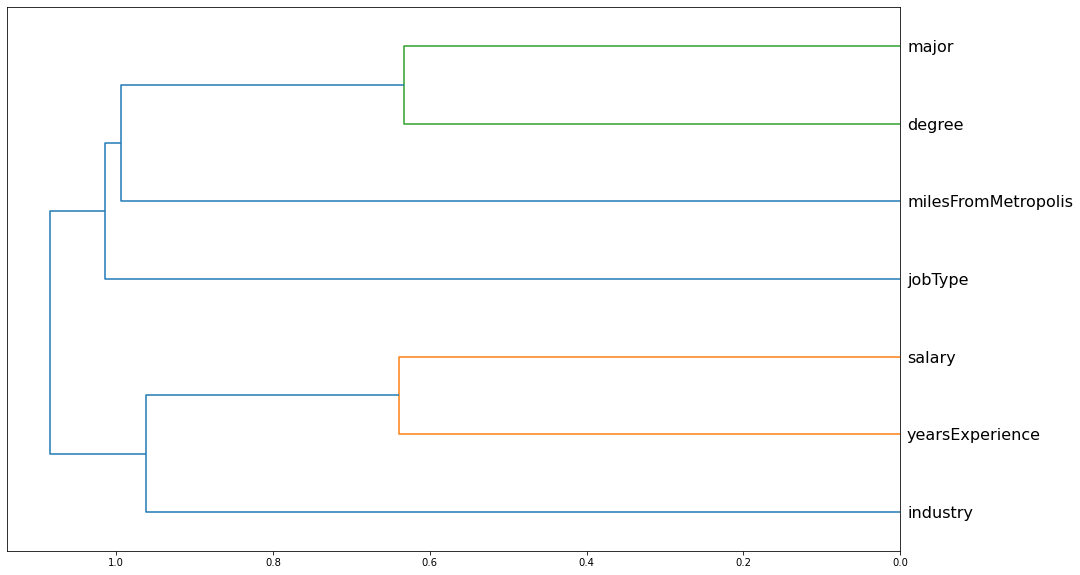

In [59]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()

observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [60]:
# scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [61]:
# Making a list of the column names to be scaled 
train_data_num =train_data[['yearsExperience','milesFromMetropolis']]

# passing data and name for scaling
data=mms.fit_transform(train_data_num)

In [62]:
df_mms=pd.DataFrame(data=data,columns=[['yearsExperience','milesFromMetropolis']])
df_mms

,yearsExperience,milesFromMetropolis
0,0.416667,0.838384
1,0.125000,0.737374
2,0.416667,0.383838
3,0.333333,0.171717
4,0.333333,0.161616
...,...,...
997543,0.791667,0.949495
997544,0.500000,0.353535
997545,0.666667,0.818182
997546,0.250000,0.050505


# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [63]:
from sklearn.preprocessing import OneHotEncoder 
ohe=OneHotEncoder()
x=train_data[['jobType','degree','major','industry']]
df_ohe=pd.DataFrame(ohe.fit_transform(x).toarray())

In [64]:
df_ohe

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997544,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
997545,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997546,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [65]:
df_scaled=df_mms.join(df_ohe)

In [66]:
df_scaled

,"(yearsExperience,)","(milesFromMetropolis,)",0,1,2,3,4,5,6,7,...,19,20,21,22,23,24,25,26,27,28
0,0.416667,0.838384,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.125000,0.737374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.416667,0.383838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.333333,0.171717,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.161616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997543,0.791667,0.949495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997544,0.500000,0.353535,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
997545,0.666667,0.818182,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997546,0.250000,0.050505,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
# Split the labels and the target
x = df_scaled
y = train_data['salary']

In [68]:
# Features
x

,"(yearsExperience,)","(milesFromMetropolis,)",0,1,2,3,4,5,6,7,...,19,20,21,22,23,24,25,26,27,28
0,0.416667,0.838384,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.125000,0.737374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.416667,0.383838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.333333,0.171717,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.161616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997543,0.791667,0.949495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997544,0.500000,0.353535,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
997545,0.666667,0.818182,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
997546,0.250000,0.050505,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
y

0         130
1         101
2         137
3         142
4         163
         ... 
999995     88
999996    160
999997     64
999998    149
999999     88
Name: salary, Length: 997548, dtype: int64

In [72]:
#importing Sklearn library for spliting train dataset into train and test dataset(size=0.2)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

In [84]:
%%time
from sklearn import metrics
from sklearn.metrics import r2_score
# Fit a Linear Regression model to the train dataset
# Import LinearRegressor
from sklearn.linear_model import LinearRegression
# Instantiate the model
lr = LinearRegression()
# Fit the model to the data
lr.fit(x_train.iloc[0:50000],y_train.iloc[0:50000])
y_pred = lr.predict(x_test)

R2_Score_lr = r2_score(y_test,y_pred)
R2_Score_lr = round(R2_Score_lr,2)
print('r2_score :' ,R2_Score_lr)

RMSE_lr = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE_lr = round(RMSE_lr,2)
print('RMSE :' ,RMSE_lr)

MSE_lr = metrics.mean_squared_error(y_test,y_pred)
MSE_lr = round(MSE_lr,2)
print('MSE :' ,MSE_lr)

MAE_lr = metrics.mean_absolute_error(y_test,y_pred)
MAE_lr = round(MAE_lr,2)
print('MAE :' ,MAE_lr)

print('Training set score: {:.3f}'.format(lr.score(x_train,y_train)))
print('Test set score: {:.3f}'.format(lr.score(x_test,y_test)))  

r2_score : 0.74
RMSE : 19.66
MSE : 386.46
MAE : 15.9
Training set score: 0.740
Test set score: 0.741
CPU times: total: 281 ms
Wall time: 179 ms


### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

In [85]:
%%time
# Fit a Random Forest Regressor model to the train dataset

from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor()

# Fit the model to the data
rf.fit(x_train.iloc[0:50000],y_train.iloc[0:50000])
y_pred = rf.predict(x_test)

R2_Score_rf = r2_score(y_test,y_pred)
R2_Score_rf = round(R2_Score_rf,2)
print('r2_score :',R2_Score_rf)

RMSE_rf = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE_rf = round(RMSE_rf,2)
print('RMSE :',RMSE_rf)

MSE_rf = metrics.mean_squared_error(y_test,y_pred)
MSE_rf = round(MSE_rf,2)
print('MSE :',MSE_rf)

MAE_rf = metrics.mean_absolute_error(y_test,y_pred)
MAE_rf = round(MAE_rf,2)
print('MAE :',MAE_rf)

print('Training set score: {:.3f}'.format(rf.score(x_train,y_train)))
print('Test set score: {:.3f}'.format(rf.score(x_test,y_test)))      

r2_score : 0.71
RMSE : 20.63
MSE : 425.39
MAE : 16.49
Training set score: 0.729
Test set score: 0.714
CPU times: total: 57.5 s
Wall time: 59.8 s


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [87]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

# Fit the model to the data
gb.fit(x_train.iloc[0:50000],y_train.iloc[0:50000])
y_pred = gb.predict(x_test)

R2_Score_gb = r2_score(y_test,y_pred)
R2_Score_gb=round(R2_Score_gb,2)
print('r2_score :',R2_Score_gb)

RMSE_gb = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE_gb = round(RMSE_gb ,2)
print('RMSE :',RMSE_gb)

MSE_gb = metrics.mean_squared_error(y_test,y_pred)
MSE_gb = round(MSE_gb,2)
print('MSE :',MSE_gb)

MAE_gb = metrics.mean_absolute_error(y_test,y_pred)
MAE_gb = round(MAE_gb,2)
print('MAE :',MAE_gb)

print('Training set score: {:.3f}'.format(gb.score(x_train,y_train)))
print('Test set score: {:.3f}'.format(gb.score(x_test,y_test)))     

r2_score : 0.75
RMSE : 19.49
MSE : 379.76
MAE : 15.75
Training set score: 0.745
Test set score: 0.745
CPU times: total: 7.31 s
Wall time: 7.41 s


### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [89]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

# Fit the model to the data
dt.fit(x_train.iloc[0:50000],y_train.iloc[0:50000])
y_pred = dt.predict(x_test)

R2_Score_dt = r2_score(y_test,y_pred)
R2_Score_dt = round(R2_Score_dt,2)
print('r2_score :' ,R2_Score_dt)

RMSE_dt = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE_dt = round(RMSE_dt,2)
print('RMSE :' ,RMSE_dt)

MSE_dt = metrics.mean_squared_error(y_test,y_pred)
MSE_dt = round(MSE_dt,2)
print('MSE :' ,MSE_dt)

MAE_dt = metrics.mean_absolute_error(y_test,y_pred)
MAE_dt = round(MAE_dt,2)
print('MAE :' ,MAE_dt)

print('Training set score: {:.3f}'.format(dt.score(x_train,y_train)))
print('Test set score: {:.3f}'.format(dt.score(x_test,y_test)))      

r2_score : 0.48
RMSE : 27.83
MSE : 774.24
MAE : 21.67
Training set score: 0.511
Test set score: 0.480
CPU times: total: 922 ms
Wall time: 939 ms


### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In [91]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor()

# Fit the model to the data
xgb.fit(x_train.iloc[0:50000],y_train.iloc[0:50000])
y_pred = xgb.predict(x_test)

R2_Score_xgb = r2_score(y_test,y_pred)
R2_Score_xgb = round(R2_Score_xgb,2)
print('r2_score :' ,R2_Score_xgb)

RMSE_xgb = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE_xgb = round(RMSE_xgb,2)
print('RMSE :' ,RMSE_xgb)

MSE_xgb = metrics.mean_squared_error(y_test,y_pred)
MSE_xgb = round(MSE_xgb,2)
print('MSE :' ,MSE_xgb)

MAE_xgb = metrics.mean_absolute_error(y_test,y_pred)
MAE_xgb = round(MAE_xgb,2)
print('MAE :' ,MAE_xgb)

print('Training set score: {:.3f}'.format(xgb.score(x_train,y_train)))
print('Test set score: {:.3f}'.format(xgb.score(x_test,y_test))) 

r2_score : 0.75
RMSE : 19.44
MSE : 378.03
MAE : 15.7
Training set score: 0.748
Test set score: 0.746
CPU times: total: 20 s
Wall time: 5.84 s


In [92]:
model_summary=pd.DataFrame({'Model':['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor',
                                     'Decision Tree Regressor','XGBRegressor'],
                            'R2_Score':[R2_Score_lr,R2_Score_rf,R2_Score_gb,R2_Score_dt,R2_Score_xgb],
                            'RMSE':[RMSE_lr,RMSE_rf,RMSE_gb,RMSE_dt,RMSE_xgb],
                            'MSE':[MSE_lr,MSE_rf,MSE_gb,MSE_dt,MSE_xgb],
                            'MAE':[MAE_lr,MAE_rf,MAE_gb,MAE_dt,MAE_xgb]})

### Comparing all the Model based on different Metrics

In [93]:
model_summary

,Model,R2_Score,RMSE,MSE,MAE
0,Linear Regression,0.74,19.66,386.46,15.90
1,Random Forest Regressor,0.71,20.63,425.39,16.49
2,Gradient Boosting Regressor,0.75,19.49,379.76,15.75
3,Decision Tree Regressor,0.48,27.83,774.24,21.67
4,XGBRegressor,0.75,19.44,378.03,15.70


## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [94]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,x_train, y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator = model,param_distributions=param_grid, 
                              n_iter=20,cv=3, verbose=2, random_state=42, n_jobs= -1)
  random.fit(x_train.iloc[0:50000],y_train.iloc[0:50000])
  print(random.best_params_)

In [95]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestRegressor(),x_train,y_train,param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False}


In [96]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingRegressor(),x_train,y_train,param_grid=GBR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25}


In [97]:
from sklearn.tree import DecisionTreeRegressor

# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : np.linspace(1, 32, 32, endpoint=True),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(DecisionTreeRegressor(),x_train,y_train,param_grid=DTR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 5.0}


In [111]:
from xgboost import XGBRegressor

# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(XGBRegressor(),x_train,y_train,param_grid=XGB_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


## Using the best parameters and training the models

### Random Forest Regressor

In [100]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Fit a Random Forest Regressor model to the train dataset

# Instantiate the model
rf= RandomForestRegressor(**{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 
                             'max_depth': 27.0, 'bootstrap': False})


# Fit the model to the data
rf.fit(x_train.iloc[0:50000],y_train.iloc[0:50000])
y_pred=rf.predict(x_test)

R2_Score_rf = r2_score(y_test,y_pred)
R2_Score_rf = round(R2_Score_rf,2)
print('r2_score :' ,R2_Score_rf)

RMSE_rf = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE_rf = round(RMSE_rf,2)
print('RMSE :' ,RMSE_rf)

MSE_rf = metrics.mean_squared_error(y_test,y_pred)
MSE_rf = round(MSE_rf,2)
print('MSE :' ,MSE_rf )

MAE_rf = metrics.mean_absolute_error(y_test,y_pred)
MAE_rf = round(MAE_rf,2)
print('MAE :' ,MAE_rf)

print('Training set score: {:.3f}'.format(rf.score(x_train,y_train)))
print('Test set score: {:.3f}'.format(rf.score(x_test,y_test)))    

r2_score : 0.39
RMSE : 30.17
MSE : 910.09
MAE : 24.16
Training set score: 0.387
Test set score: 0.389
CPU times: total: 6.77 s
Wall time: 6.79 s


### Gradient Boosting Regressor

In [101]:
%%time
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Fit a Gradient Boosting Regressor model to the train dataset

# Instantiate the model
gb = GradientBoostingRegressor(**{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25})

gb.fit(x_train.iloc[0:50000],y_train.iloc[0:50000])
y_pred = gb.predict(x_test)

R2_Score_gb = r2_score(y_test,y_pred)
R2_Score_gb = round(R2_Score_gb,2)
print('r2_score :' ,R2_Score_gb)

RMSE_gb = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE_gb = round(RMSE_gb,2)
print('RMSE :' ,RMSE_gb)

MSE_gb = metrics.mean_squared_error(y_test,y_pred)
MSE_gb = round(MSE_gb ,2)
print('MSE :' ,MSE_gb)
MAE_gb = metrics.mean_absolute_error(y_test,y_pred)
MAE_gb = round(MAE_gb,2)
print('MAE :' ,MAE_gb)

print('Training set score: {:.3f}'.format(gb.score(x_train,y_train)))
print('Test set score: {:.3f}'.format(gb.score(x_test,y_test)))

r2_score : 0.75
RMSE : 19.2
MSE : 368.66
MAE : 15.56
Training set score: 0.753
Test set score: 0.752
CPU times: total: 9 s
Wall time: 9 s


### Decision Tree Regrsessor

In [110]:
%%time
from sklearn.tree import DecisionTreeRegressor
# Fit a Decision Tree Regressor model to the train dataset

# Instantiate the model
dt =  DecisionTreeRegressor(**{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 
                                'max_features': None, 'max_depth': 8.0})

# Instantiate the model
dt.fit(x_train.iloc[0:50000],y_train.iloc[0:50000])
y_pred = dt.predict(x_test)


R2_Score_dt = r2_score(y_test,y_pred)
R2_Score_dt = round(R2_Score_dt,2)
print('r2_score :' ,R2_Score_dt)

RMSE_dt = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE_dt = round(RMSE_dt,2)
print('RMSE :' ,RMSE_dt)

MSE_dt = metrics.mean_squared_error(y_test,y_pred)
MSE_dt = round(MSE_dt ,2)
print('MSE :' ,MSE_dt )

MAE_dt = metrics.mean_absolute_error(y_test,y_pred)
MAE_dt = round(MAE_dt,2)
print('MAE :' ,MAE_dt)

print('Training set score: {:.3f}'.format(dt.score(x_train,y_train)))
print('Test set score: {:.3f}'.format(dt.score(x_test,y_test))) 

r2_score : 0.24
RMSE : 33.68
MSE : 1134.54
MAE : 27.15
Training set score: 0.241
Test set score: 0.238
CPU times: total: 438 ms
Wall time: 430 ms


### XGBoost Regressor

In [112]:
%%time
from xgboost import XGBRegressor
# Fit a XGB Regressor model to the train dataset

# Instantiate the model
xgb = XGBRegressor(**{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4})

 # Fit the model to the data
xgb.fit(x_train.iloc[0:50000],y_train.iloc[0:50000])
y_pred = xgb.predict(x_test)

R2_Score_xgb = r2_score(y_test,y_pred)
R2_Score_xgb = round(R2_Score_xgb,2)
print('r2_score :' ,R2_Score_xgb)

RMSE_xgb = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE_xgb = round(RMSE_xgb,2)
print('RMSE :' ,RMSE_xgb)

MSE_xgb = metrics.mean_squared_error(y_test,y_pred)
MSE_xgb = round(MSE_xgb,2)
print('MSE :' ,MSE_xgb)

MAE_xgb = metrics.mean_absolute_error(y_test,y_pred)
MAE_xgb = round(MAE_xgb,2)
print('MAE :' ,MAE_xgb)

print('Training set score: {:.3f}'.format(xgb.score(x_train,y_train)))
print('Test set score: {:.3f}'.format(xgb.score(x_test,y_test)))

r2_score : 0.76
RMSE : 19.09
MSE : 364.44
MAE : 15.48
Training set score: 0.755
Test set score: 0.755
CPU times: total: 26 s
Wall time: 6.84 s


In [118]:
model_summary_tuned = pd.DataFrame({'Model':['Random Forest Regressor', 'Gradient Boosting Regressor',
                                     'Decision Tree Regressor','XGBoost Regressor'],
                            'R2_Score':[R2_Score_rf,R2_Score_gb,R2_Score_dt,R2_Score_xgb],
                            'RMSE':[RMSE_rf,RMSE_gb,RMSE_dt,RMSE_xgb],
                            'MSE':[MSE_rf,MSE_gb,MSE_dt,MSE_xgb],
                            'MAE':[MAE_rf,MAE_gb,MAE_dt,MAE_xgb]})

### Comparing all the Tuned_Model based on different Metrics

In [119]:
model_summary_tuned

,Model,R2_Score,RMSE,MSE,MAE
0,Random Forest Regressor,0.39,30.17,910.09,24.16
1,Gradient Boosting Regressor,0.75,19.20,368.66,15.56
2,Decision Tree Regressor,0.24,33.68,1134.54,27.15
3,XGBoost Regressor,0.76,19.09,364.44,15.48


##### Here, we use "Gradient Boosting Regressor" model for salary prediction

In [182]:
# train data actual vs predicted salary, model==> "Gradient Boosting Regressor"
predicted_salary = gb.predict(x_test)               
actual_salary = y_test                       

In [183]:
train_data_actual_predicted_salary = pd.DataFrame({'Actual_salary':actual_salary ,'Predicted_salary':predicted_salary})

Employee having salary less than predicted salary is likely to leave an organization !!

In [184]:
train_data_actual_predicted_salary    

,Actual_salary,Predicted_salary
80037,84,81.978275
650091,131,115.475140
945244,91,114.613967
822418,106,106.864050
958490,70,89.540314
...,...,...
785432,147,150.384399
717517,66,66.227374
95269,117,155.186119
804941,124,116.471104


### Now working with the test dataset provided

In [122]:
# test data 
test_x = test_data
test_x

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


In [123]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [124]:
# Making a list of the column names to be scaled 
train_data_num =test_data[['yearsExperience','milesFromMetropolis']]

# passing data and name for scaling
data=mms.fit_transform(train_data_num)

In [125]:
df_mms=pd.DataFrame(data=data,columns=[['yearsExperience','milesFromMetropolis']])
df_mms

,yearsExperience,milesFromMetropolis
0,0.916667,0.737374
1,0.833333,0.474747
2,0.708333,0.090909
3,0.583333,0.969697
4,0.416667,0.444444
...,...,...
999995,0.583333,0.030303
999996,0.833333,0.676768
999997,0.041667,0.919192
999998,0.583333,0.636364


In [126]:
from sklearn.preprocessing import OneHotEncoder 
ohe=OneHotEncoder()
x=test_data[['jobType','degree','major','industry']]
df_ohe=pd.DataFrame(ohe.fit_transform(x).toarray())

In [127]:
df_scaled=df_mms.join(df_ohe)

In [128]:
df_scaled

,"(yearsExperience,)","(milesFromMetropolis,)",0,1,2,3,4,5,6,7,...,19,20,21,22,23,24,25,26,27,28
0,0.916667,0.737374,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.833333,0.474747,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.708333,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.583333,0.969697,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.416667,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.583333,0.030303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
999996,0.833333,0.676768,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
999997,0.041667,0.919192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
999998,0.583333,0.636364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [129]:
test_x = df_scaled

In [130]:
# Perforn the prediction on the test dataset
y_predicted = gb.predict(test_x)
y_predicted

array([109.23535553,  88.37147273, 175.95635565, ...,  56.57676062,
       164.06289131, 108.8133687 ])

In [136]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted,columns=['Test_Data_Prediction'])

From the analysis we conclude that "Doctoral" Degree have somehow higher salaries compare to others, small insights for our business !!

In [137]:
# predicted values in dataframe
predictions      

,Test_Data_Prediction
0,109.235356
1,88.371473
2,175.956356
3,106.162188
4,120.426460
...,...
999995,164.102632
999996,106.850751
999997,56.576761
999998,164.062891


### If as we see the difference in values

**Example**: If data sample having real value is 58 but the model predicted it to be 74.. This may be because the other competitors are offering him more as compared to the current salary.. so he is leaving the company.

**In above example we can clearly see a difference between the real salary given to the employee and the predicted salary which may be the probable reason for the employee to leave the company**

## **`Insights`**:

- ### Mr.Francis provides these following insignts to Mr. Andrew after working on the dataset provided:

**1.Major employee of your company are not happy with the salary they are being provided..even if they have the required skills to do the job as compared to other competitors.**

**2.The employee living in the metro cities are satisfied with the salaries they are receiving...but employee's living far from the city are not getting a satisfactory salary which is the most probable reason for them leaving the company.**

    


## **`solution`**:

1. Either increase the salary of these employee's(if they have the required degree and major)

2. Provide accomodation to people living in places far from city so that they are satisfied.

3. provide appraisal or some token of appreciation to such employee's

Note: take all the necessary steps to make the employee more loyal to the company

## **`QUESTION`**:

**Mr. Pandey provides the detail of a new hired employee and asks us to predict a range of salary which the company can offer to that employee:**

**job_type** = CTO

**degree** = Masters

**major** = Biology

**industry** = Health

**experience** = 17

miles from **metropolis** = 9

## **`SOLUTION`**:

We will fit in these data points into the model and suppose the model provide us the answer as 180

In this case we will basically provide the Manager with a range of salaries i.e

We can offer him a salary range of 175-190 dollars

## **`CONCLUSION`**:
### According to Accuaracy & Metrics parameters of all model,the "Gradient Boosting Regressor" model performed well giving training score of 75.30% and test score of 75.20%, r2_score(75.00%) which is best among all other models, so we use this model for prediction & deployment purpose, we get good predictions (predicted salary) from our model when matched with actual salary, from this we know that if employee is getting salary less than predicted salary by our model & this is probable reason for employee to leaving an organization or company, so to stay on this issue, we have solution is that we can increase the salary of employee if they have requied degree, provide good accomodation & better working environment, that's how in this way we can solve our business problem of "Employee Atrrition"  !!

### Even though we use only 50,000 samples model perform well, the model may perform much better when trained on complete dataset. We have performed EDA, data preprocessing, build different models, did hyperparameter tunning for model and did prediction !!